In [ ]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_data=pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
test_data=pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Compare fraud and non fraud value counts

In [4]:
train_data["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

<Axes: title={'center': 'Data count'}, ylabel='count'>

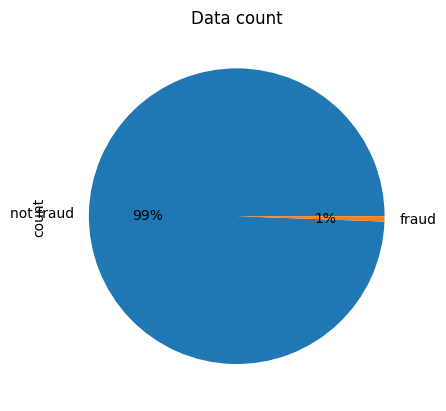

In [5]:
train_data["is_fraud"].value_counts().plot(kind="pie", labels=["not fraud", "fraud"], autopct="%0.0f%%", title="Data count")

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels=label_encoder.fit_transform(train_data["is_fraud"])
train_labels

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
test_labels=label_encoder.fit_transform(test_data["is_fraud"])
test_labels

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
#drop unnecessary columns
train_data.drop(columns=["Unnamed: 0", "trans_date_trans_time", "cc_num", "first", "last", "street", "city", "state", "zip", "dob", "trans_num"], inplace=True)
train_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [10]:
test_data.drop(columns=["Unnamed: 0", "trans_date_trans_time", "cc_num", "first", "last", "street", "city", "state", "zip", "dob", "trans_num"], inplace=True)
test_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [11]:
#encode non numerical data
train_data["merchant"]=label_encoder.fit_transform(train_data["merchant"])
train_data["category"]=label_encoder.fit_transform(train_data["category"])
train_data["gender"]=label_encoder.fit_transform(train_data["gender"])
train_data["job"]=label_encoder.fit_transform(train_data["job"])
train_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0


In [12]:
test_data["merchant"]=label_encoder.fit_transform(test_data["merchant"])
test_data["category"]=label_encoder.fit_transform(test_data["category"])
test_data["gender"]=label_encoder.fit_transform(test_data["gender"])
test_data["job"]=label_encoder.fit_transform(test_data["job"])
test_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


In [13]:
train_data["merchant"].value_counts()

merchant
316    4403
105    3649
571    3634
349    3510
70     3493
       ... 
143     775
633     775
423     759
505     753
221     727
Name: count, Length: 693, dtype: int64

In [14]:
#remove label from training features
train_data=train_data.drop(columns="is_fraud")
train_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459


In [15]:
#remove label from test features
test_data=test_data.drop(columns="is_fraud")
test_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734


## Build Model: Decision Tree

In [16]:
#split train data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid=train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
len(X_train), len(X_valid), len(y_train), len(y_valid)

(1037340, 259335, 1037340, 259335)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

Model_1=DecisionTreeClassifier()
Model_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
val_preds=Model_1.predict(X_valid)
accuracy_score(y_valid, val_preds)

0.9959588948657142

In [19]:
print(classification_report(y_valid, val_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.65      0.67      0.66      1520

    accuracy                           1.00    259335
   macro avg       0.82      0.84      0.83    259335
weighted avg       1.00      1.00      1.00    259335



In [20]:
test_preds=Model_1.predict(test_data)
accuracy_score(test_labels, test_preds)

0.9923792420269957

In [21]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.27      0.59      0.37      2145

    accuracy                           0.99    555719
   macro avg       0.64      0.79      0.68    555719
weighted avg       1.00      0.99      0.99    555719



## Model 2: Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

Model_2=LogisticRegression()
Model_2.fit(X_train, y_train)

LogisticRegression()

In [23]:
val_preds_2=Model_2.predict(X_valid)
accuracy_score(y_valid, val_preds_2)

0.9941388551487458

In [25]:
test_preds_2=Model_2.predict(test_data)
accuracy_score(test_labels, test_preds_2)

0.9961401355721147

In [30]:
print(classification_report(test_labels, test_preds_2, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       1.00      0.50      0.50    555719
weighted avg       1.00      1.00      0.99    555719

